# installing the dependencies

In [1]:
pip install -r req.txt

# Getting set up and loading up the data

In [2]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

### Removing dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)

    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)

      if tip not in image_exts:
        print(f'Image not in ext list {image_path}')

    except Exception as e:
      print(f'Issue with image {image_path}')

# Load Data

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [10]:
data.as_numpy_iterator().next()

(array([[[[  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          ...,
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ]],
 
         [[  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          ...,
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ]],
 
         [[  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          ...,
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ]],
 
         ...,
 
         [[ 

In [11]:
batch = data.as_numpy_iterator().next()

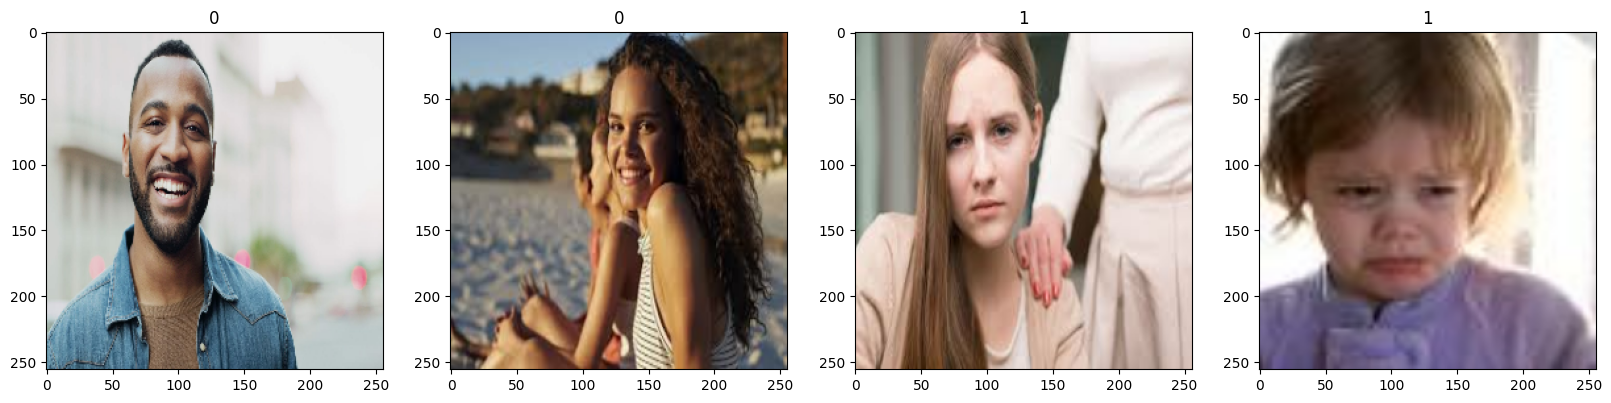

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Scale data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[7.99046397e-01, 7.95124829e-01, 7.87281692e-01],
          [7.98100471e-01, 7.94178903e-01, 7.86335766e-01],
          [7.97365189e-01, 7.93443620e-01, 7.85600483e-01],
          ...,
          [7.01558650e-01, 6.97637081e-01, 6.89793944e-01],
          [8.27449083e-01, 8.23527515e-01, 8.15684378e-01],
          [7.29191542e-01, 7.25269973e-01, 7.17426836e-01]],
 
         [[7.95301020e-01, 7.91379452e-01, 7.83536315e-01],
          [7.94975519e-01, 7.91053951e-01, 7.83210814e-01],
          [7.95360386e-01, 7.91438818e-01, 7.83595681e-01],
          ...,
          [6.66770041e-01, 6.62848473e-01, 6.55005336e-01],
          [8.18993211e-01, 8.15071642e-01, 8.07228506e-01],
          [6.85516238e-01, 6.81594670e-01, 6.73751533e-01]],
 
         [[7.88669944e-01, 7.84748375e-01, 7.76905239e-01],
          [7.99929142e-01, 7.96007574e-01, 7.88164437e-01],
          [7.96045899e-01, 7.92124331e-01, 7.84281194e-01],
          ...,
          [6.74940646e-01, 6.71019077e-01, 6.6317

### split data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep learning model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# Train

In [23]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
7/7 [==============================] - 10s 379ms/step - loss: 1.9801 - accuracy: 0.4554 - val_loss: 0.6801 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 4s 412ms/step - loss: 0.6838 - accuracy: 0.5491 - val_loss: 0.6071 - val_accuracy: 0.6875
Epoch 3/20
7/7 [==============================] - 4s 419ms/step - loss: 0.6393 - accuracy: 0.6830 - val_loss: 0.6061 - val_accuracy: 0.7344
Epoch 4/20
7/7 [==============================] - 4s 412ms/step - loss: 0.6117 - accuracy: 0.7589 - val_loss: 0.5194 - val_accuracy: 0.8125
Epoch 5/20
7/7 [==============================] - 4s 398ms/step - loss: 0.5390 - accuracy: 0.7946 - val_loss: 0.4488 - val_accuracy: 0.8281
Epoch 6/20
7/7 [==============================] - 4s 410ms/step - loss: 0.4867 - accuracy: 0.7723 - val_loss: 0.4223 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 4s 417ms/step - loss: 0.3683 - accuracy: 0.8705 - val_loss: 0.3413 - val_accuracy: 0.9062
Epoch 8/20
7/7 [===

# plot

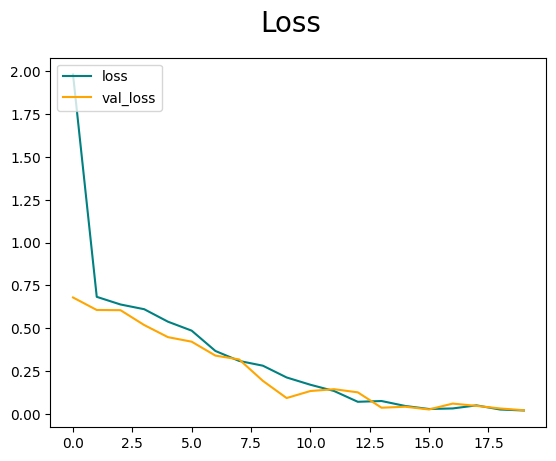

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

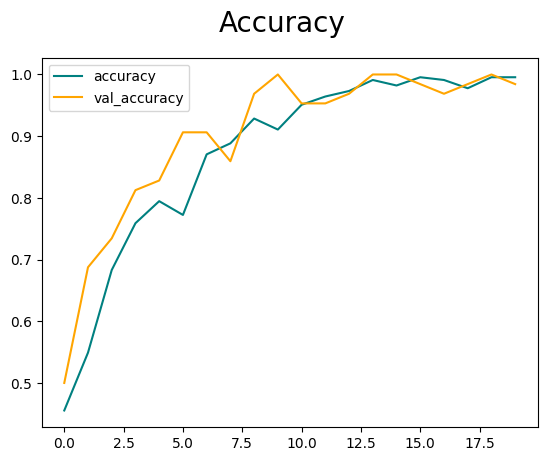

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [26]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [27]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [28]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 435ms/step


In [29]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.85714287, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9411765, shape=(), dtype=float32)


# Test

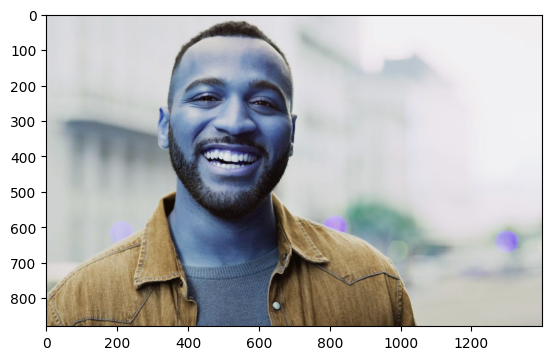

In [30]:
img = cv2.imread('/content/data/happy/05-12-21-happy-people.jpg')
plt.imshow(img)
plt.show()

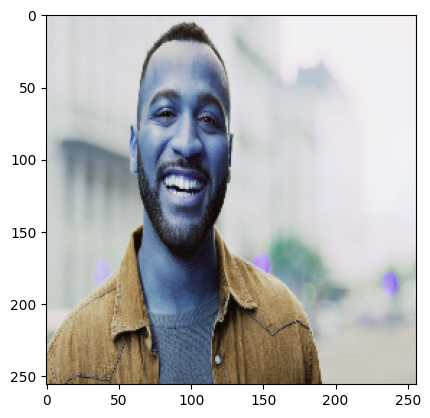

In [31]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [32]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 198ms/step


In [33]:
yhat

array([[0.03146017]], dtype=float32)

In [34]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# Saving

In [35]:
from tensorflow.keras.models import load_model

In [36]:
model.save('imageclassifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
